#Time Series


In [ ]:
#Data Ingestion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data
df=pd.read_csv('/content/Time_sereis_data.CSV')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [ ]:
#Univariante analysis
stock_data=df[['Date','Close']]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [ ]:
stock_data['Date']=pd.to_datetime(stock_data.Date)

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [ ]:
stock_data=stock_data.set_index('Date')

In [ ]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


#Eda of the data




In [ ]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


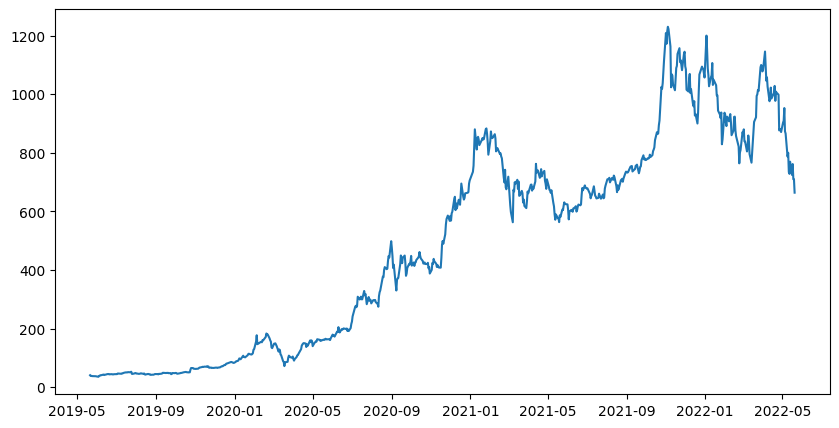

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

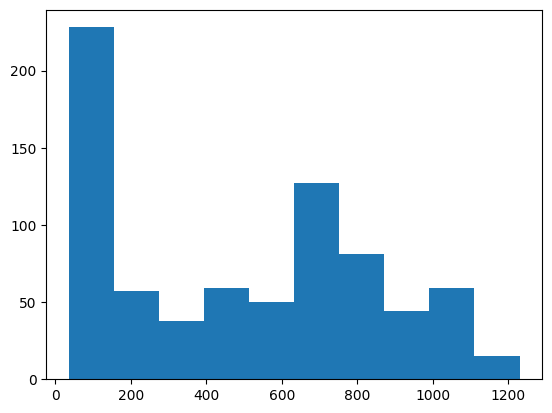

In [ ]:
plt.hist(stock_data.Close)

<Axes: xlabel='Close', ylabel='Density'>

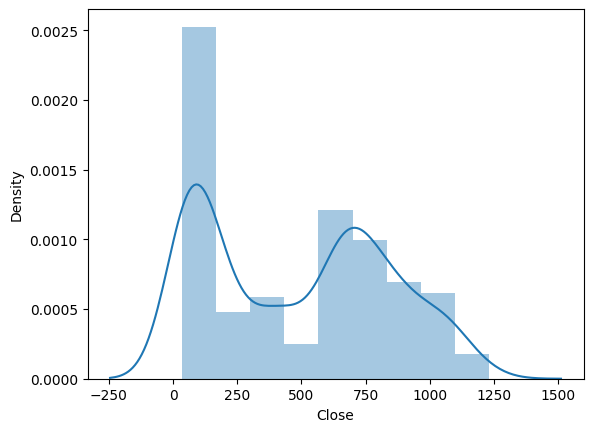

In [ ]:
sns.distplot(stock_data.Close)

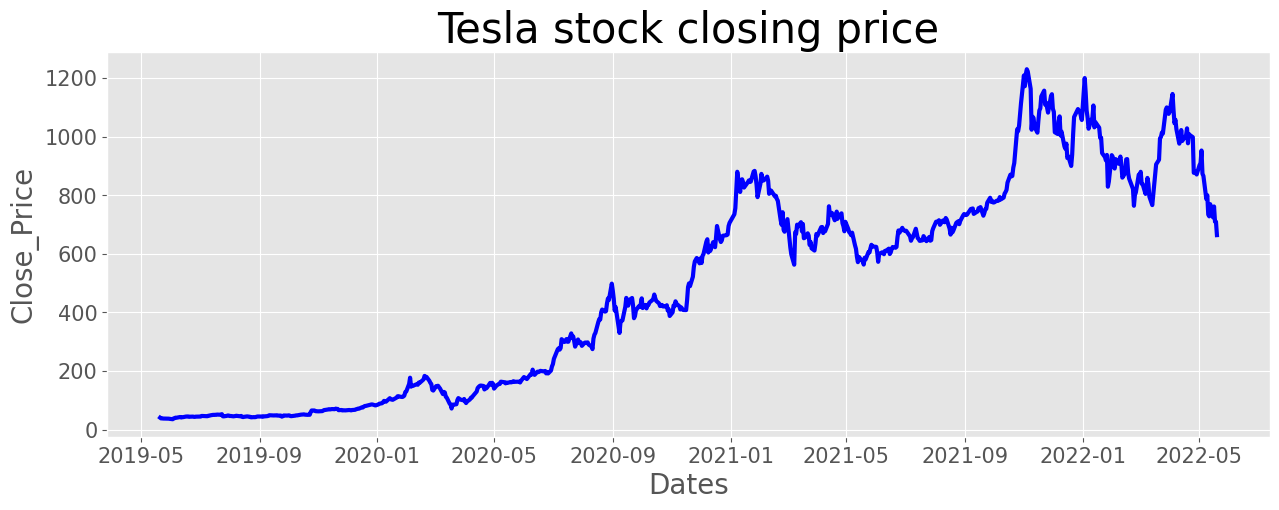

In [ ]:
#plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close_Price',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=3,color='blue')
plt.title('Tesla stock closing price',fontsize=30)
plt.show()

In [ ]:
roll_mean=stock_data['Close'].rolling(12).mean() #we do this to smoothen the data, so to find out various pattern out of it

In [ ]:
roll_std=stock_data['Close'].rolling(12).std()

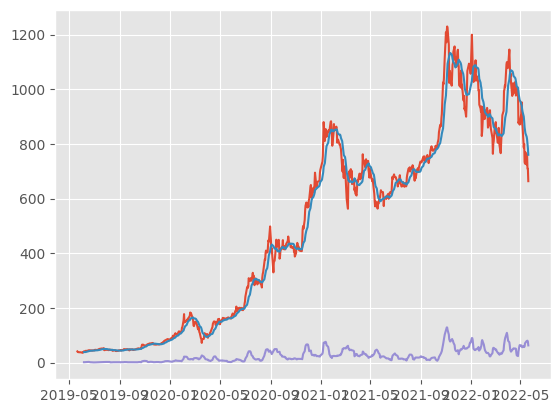

In [ ]:
plt.plot(stock_data['Close'])
plt.plot(roll_mean)
plt.plot(roll_std)

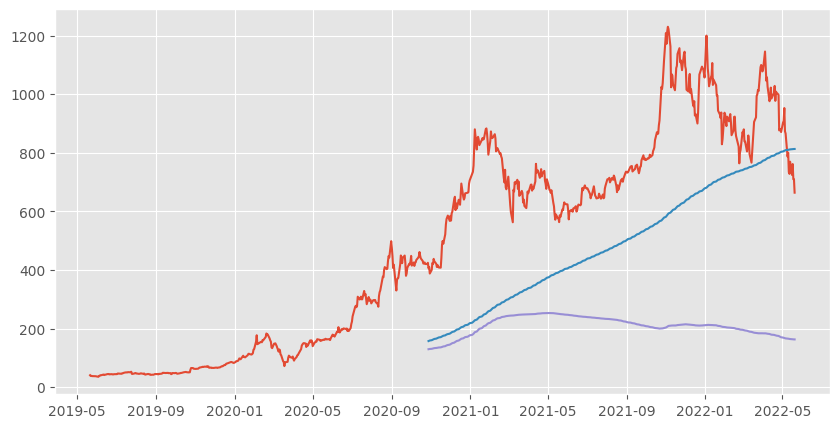

In [ ]:
roll_mean=stock_data['Close'].rolling(365).mean()
roll_std=stock_data['Close'].rolling(365).std()
plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'])
plt.plot(roll_mean)
plt.plot(roll_std)


#result
#the data is very smooth and it is not starting from origin because it has lot of nan values in it

In [ ]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data['Close'])

In [ ]:
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [ ]:
pd.Series(adft[0:4],index=['test_stats','p_value','lag','datapoints'])

test_stats     -1.363009
p_value         0.599876
lag             9.000000
datapoints    748.000000
dtype: float64

In [ ]:
# null_hypothesis=data is non-stationary
# alternate_hpothesis=data is stationory

# p_value=0.599876

# p<0.05
# reject the null_hyothesis

# p_value>0.05:
# we fail to reject the null_hypothesis

# Reult:
# WE accept the null_hypothesis and our data is non-stationary

In [ ]:
#testfor stationary
def test_stationary(timeseries):
  #determing rolling statistics
  rollmean=timeseries.rolling(12).mean()  #rolling mean
  rollstd=timeseries.rolling(12).std()    #rollling standard deviation
  #plot rolling statistics
  plt.figure(figsize=(15,5))
  plt.grid('both')
  plt.plot(timeseries,color='blue',label='Original',linewidth=3)
  plt.plot(rollmean,color='red',label='Rolling_mean',linewidth=3)
  plt.plot(rollstd,color='black',label='Rolling_std',linewidth=4)
  plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
  plt.title('Rolling mean and Standard_deviation',fontsize=30)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show(block=False)

  print('Result of dickey fuller test')
  adft=adfuller(timeseries,autolag='AIC')
  output=pd.Series(adft[0:4],index=['test_stats','p_value','lag','datapoints'])
  for key,values in adft[4].items():
    output['critical value(%s)'%key]=values
  print(output)


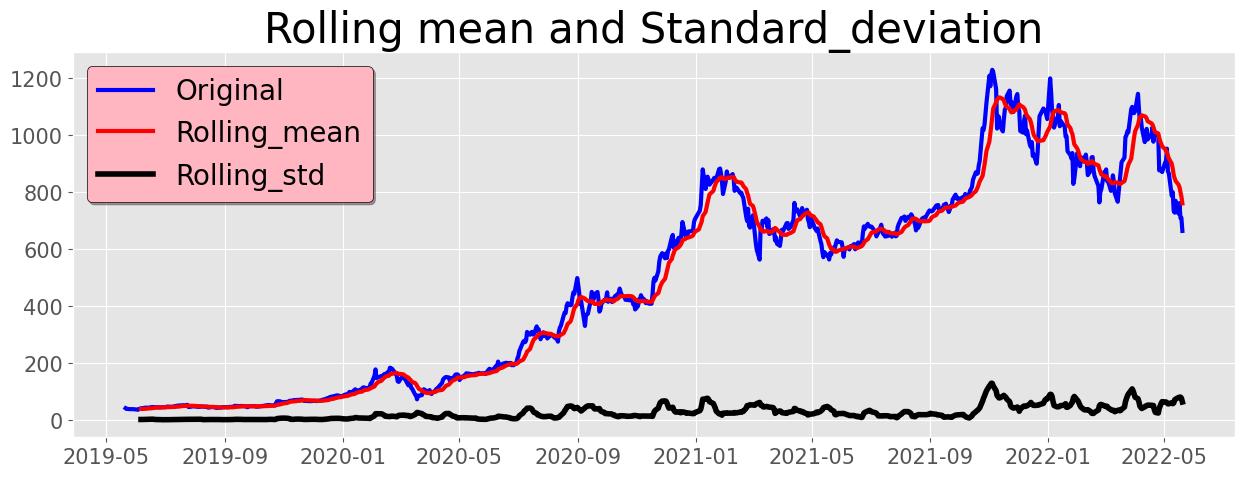

Result of dickey fuller test
test_stats              -1.363009
p_value                  0.599876
lag                      9.000000
datapoints             748.000000
critical value(1%)      -3.439123
critical value(5%)      -2.865412
critical value(10%)     -2.568832
dtype: float64


In [ ]:
test_stationary(stock_data.Close)

<Axes: ylabel='Close'>

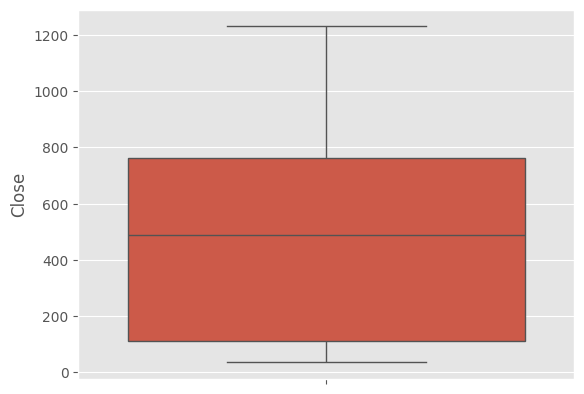

In [ ]:
#to see outlier
sns.boxplot(stock_data['Close'])
#no outlier found

In [ ]:
#time_series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[['Close']],period=12)

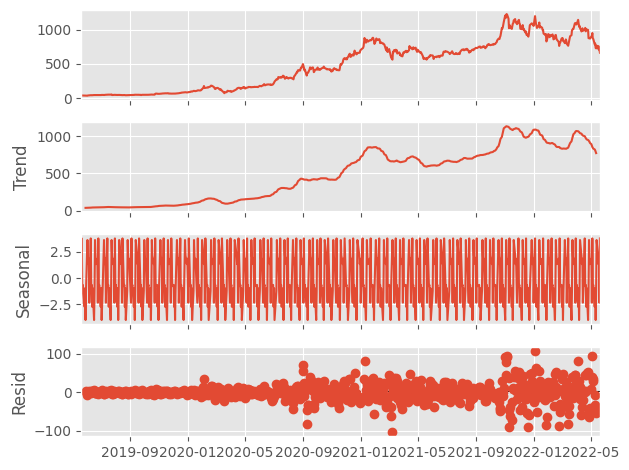

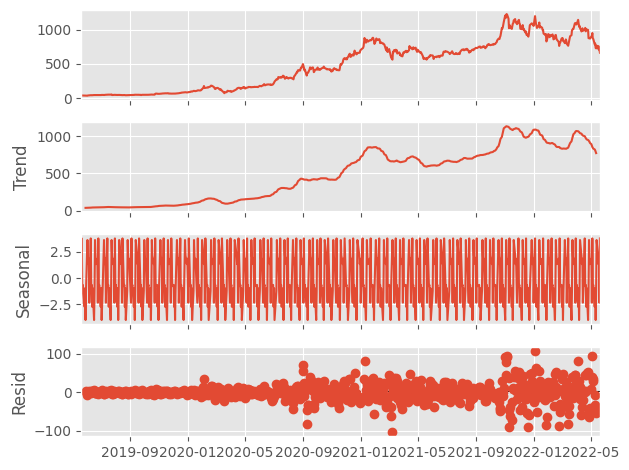

In [ ]:
result.plot()# here 2 graph are present becoz it is giving the output for both multiplicative and additive

In [ ]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

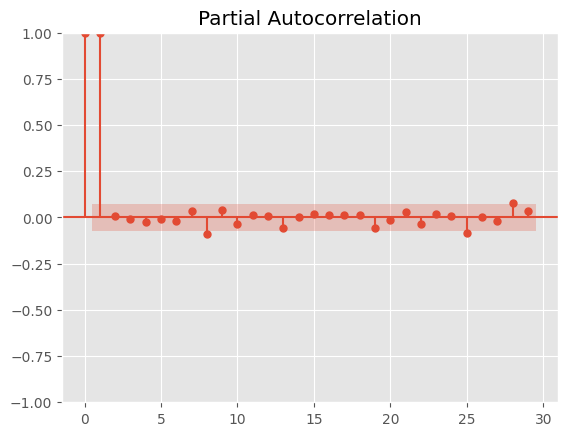

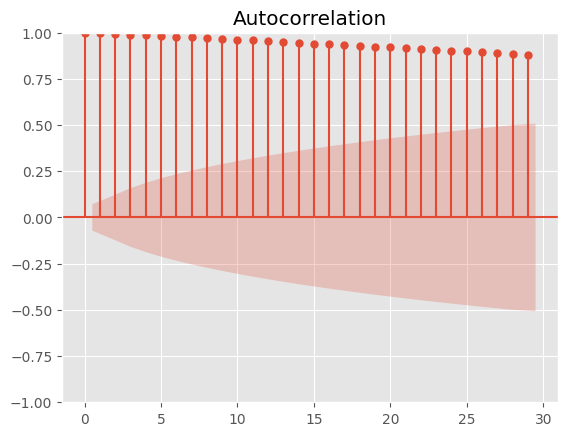

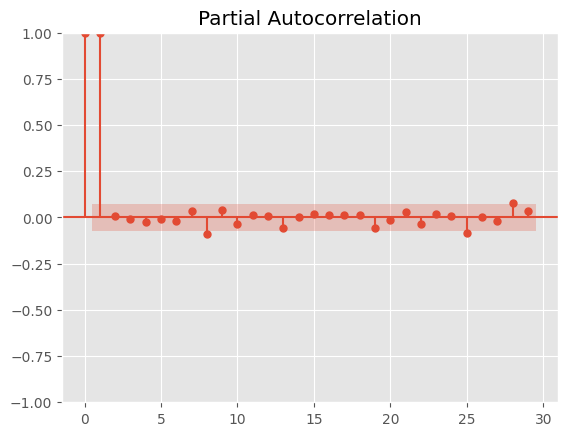

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data['Close'])
plot_pacf(stock_data.Close)

#preprocessing the data

In [ ]:
df_close=stock_data['Close']

In [ ]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [ ]:
df_close=df_close.diff() #appling differencing

In [ ]:
df_close=df_close.dropna()

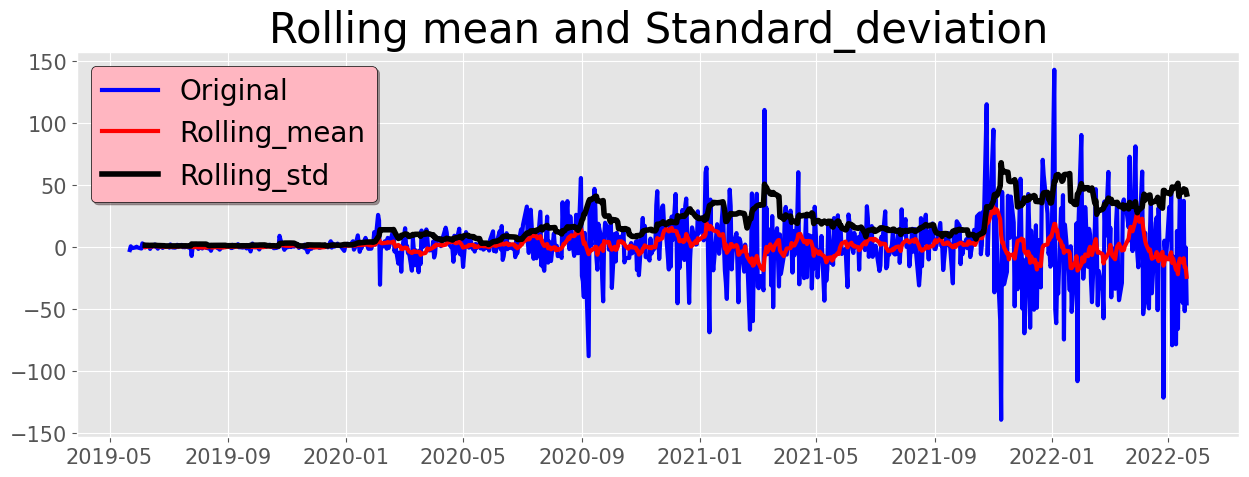

Result of dickey fuller test
test_stats            -8.324564e+00
p_value                3.498786e-13
lag                    8.000000e+00
datapoints             7.480000e+02
critical value(1%)    -3.439123e+00
critical value(5%)    -2.865412e+00
critical value(10%)   -2.568832e+00
dtype: float64


In [ ]:
test_stationary(df_close)

In [ ]:
#splittind the data into training and testing data
df_close[0:-60]

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

In [ ]:
df_close[-60:]

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

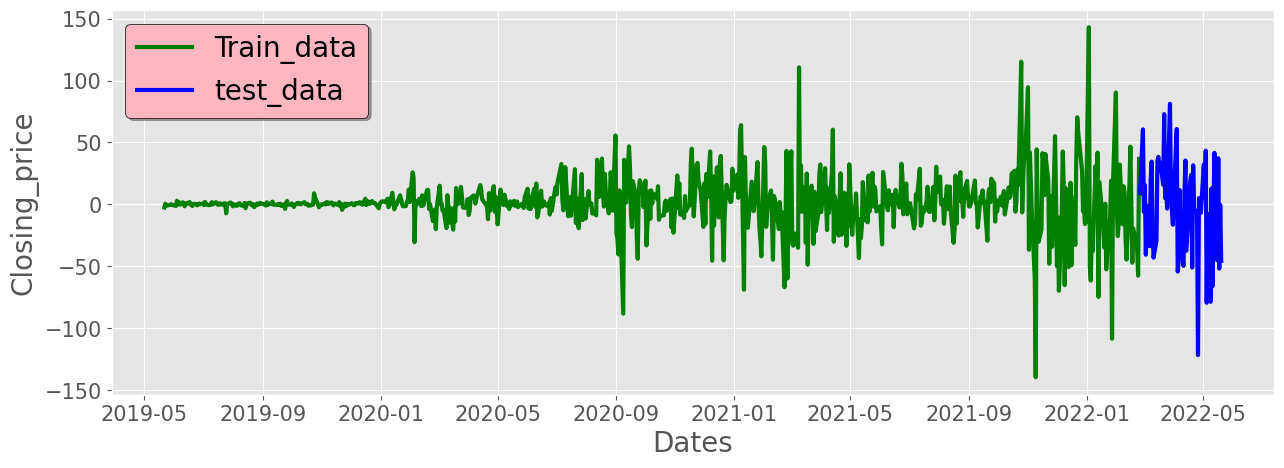

In [ ]:
#split data into training and testing data
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(15,5))
plt.grid('True')
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing_price',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data,color='green',label='Train_data',linewidth=3)
plt.plot(test_data,color='blue',label='test_data',linewidth=3)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
history=[x for x in train_data]

In [ ]:
history

[-2.4699974060058594,
 0.5519981384277415,
 -0.9720001220703125,
 -0.385997772216804,
 0.23199844360351562,
 -0.3279991149902344,
 -0.61199951171875,
 -1.2380027770996094,
 2.9260025024414062,
 0.5979995727539062,
 1.871997833251946,
 -0.289997100830071,
 1.6759986877441406,
 0.8439979553222656,
 -1.5679969787597656,
 0.9300003051757812,
 0.20199966430664062,
 2.0219993591308594,
 -0.0579986572265625,
 0.3379974365234375,
 -1.36199951171875,
 0.4480018615722656,
 0.3559989929199219,
 -0.7760009765625,
 -0.09799957275390625,
 0.7140007019042969,
 0.12400054931640625,
 0.7419967651367259,
 -0.523998260498054,
 2.0699996948242188,
 -0.3600006103515625,
 -0.5519981384277344,
 -0.055999755859375,
 1.7719993591308665,
 -0.06399917602539773,
 1.2959976196289062,
 1.6840019226074219,
 -0.2239990234375,
 0.4959983825683594,
 -0.26399993896484375,
 0.9280014038085938,
 -0.5,
 0.8979988098144602,
 0.9420013427734304,
 -7.212001800537102,
 -0.15599822998047586,
 1.5459976196289062,
 1.298000335693

In [ ]:
model=ARIMA(history,order=(1,1,1))
model=model.fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Mon, 10 Jun 2024   AIC                           6303.741
Time:                        19:22:24   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.341      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
len(history)

697

In [ ]:
model.forecast()

array([0.04741687])

In [ ]:
mean_squared_error([test_data[0]],model.forecast())

81.94881931903844

In [ ]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

9.052558716685489

In [ ]:
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)
for i in p_values:
  for j in d_values:
    for k in q_values:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [ ]:
def train_arima_model(X,y,arima_order):
  #prepare trainig dataset
  #make prediction list
  history=[x for x in X]
  predictions=list()
  for t in range(len(y)):
    model=ARIMA(history,order=arima_order)
    model_fit=model.fit()
    yhat=model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[t])
  #calculate out of sample error
  rmse=np.sqrt(mean_squared_error(y,predictions))
  return rmse


In [ ]:
#evaluate different combinations of p,d,and q values for an ARIMA model to get  the best order for ARIMA MODEL
def evaluate_model(dataset,test,p_values,d_values,q_values):
  dataset=dataset.astype('float32')
  best_score,best_cfg=float('inf'),None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order=(p,d,q)
        try:
          rmse=train_arima_model(dataset,test,order)
          if rmse < best_score:
            best_score,best_cfg=rmse,order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('ARIMA%s RMSE=%.3f' % (best_cfg,best_score))

In [ ]:
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)
evaluate_model(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=39.610
ARIMA(0, 0, 1) RMSE=39.578
ARIMA(0, 1, 0) RMSE=57.835
ARIMA(0, 1, 1) RMSE=39.611
ARIMA(0, 1, 2) RMSE=39.580
ARIMA(0, 2, 0) RMSE=104.683
ARIMA(0, 2, 1) RMSE=57.876
ARIMA(0, 2, 2) RMSE=39.615
ARIMA(1, 0, 0) RMSE=39.570
ARIMA(1, 0, 1) RMSE=39.636
